<a href="https://colab.research.google.com/github/sfarias03/Seattle-Weather/blob/main/Sam_Farias_Seattle_St_Louis_Data_Rain_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

 In this research project, the aim was to compare the amount of rainfall in Seattle and St. Louis, two major cities in the United States with different climates and geographic locations. The research question: What city gets the most rain? To answer this question, we will be using historical rainfall data obtained from the National Oceanic and Atmospheric Administration (NOAA). By analyzing and comparing historical rainfall data through the use of graphs, we hope to gain insights into the rainfall patterns and trends in these two cities.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 
The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Seattle data set:

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

St. Louis data set

In [4]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

Start by looking at the head of each data frame. This will let us see the names of the columns and a few example values for each column.

In [5]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


We can consult the [data documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) to see the definition of each variable.

We use the `info` method to check the data types, size of the data frame, and numbers of missing values.

In [6]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [100]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


**Examine the contents of the St. Louis data set**

In [7]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


From the head of the data frame, the data sets appear to have similar content. However, the columns are not entirely the same

We can also see that the St. Louis data set contains data from 2017, which we do not need.

In [8]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [9]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

We are not concerned about the differences because we only need the `DATE` and `PRCP` columns from each data set.

Use the `info` method to check the data types, size of the DataFrame, and numbers of missing values.

In [10]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


We see the same data types as for the Seattle data set. 

One striking observation is that the St. Louis data set contains many more observations than the Seattle data set. We already noted that the St. Louis data set contains values from 2017, but that would not account for the size of the data set.


In [11]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [12]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [13]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

## Converting data types

It is important to convert dates to `datetime` types (or `int`) before plotting the data, because when dates are strings or objects, a plot will show successive values next to each other without recognizing possible gaps in dates.

In [14]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

Convert the St. Louis `DATE` variable to datetime type.

In [17]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

**Now we will check whether the data are suitable?**

Plot the daily precipitation data for Seattle.

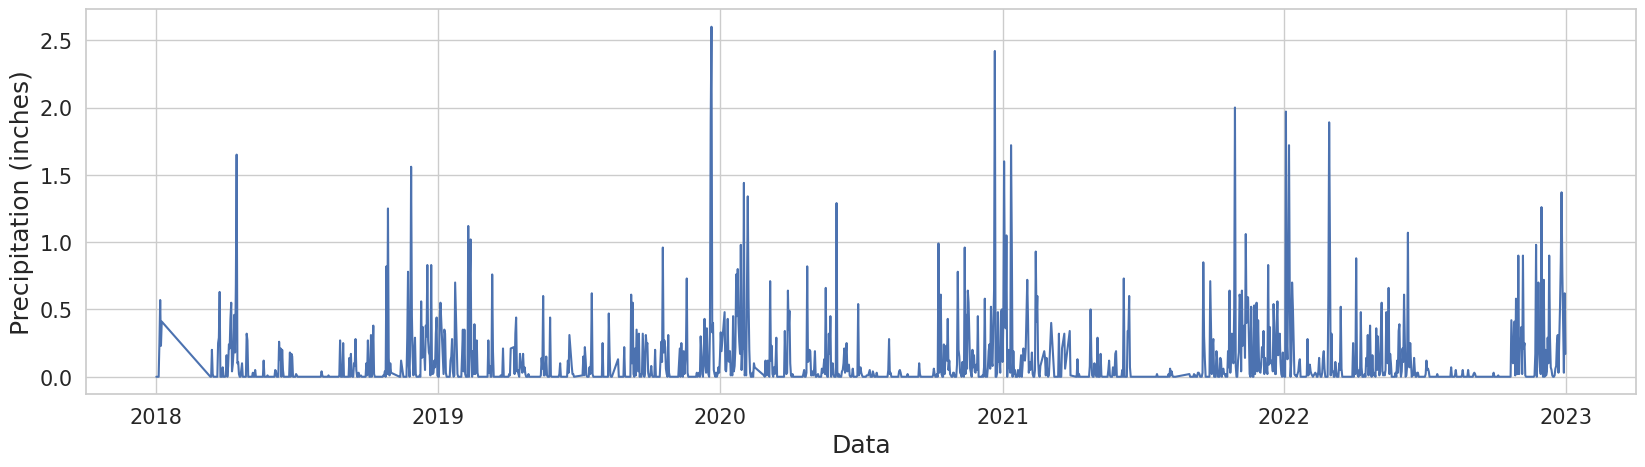

In [18]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Data', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

**Plot the daily precipitation data for St. Louis.**

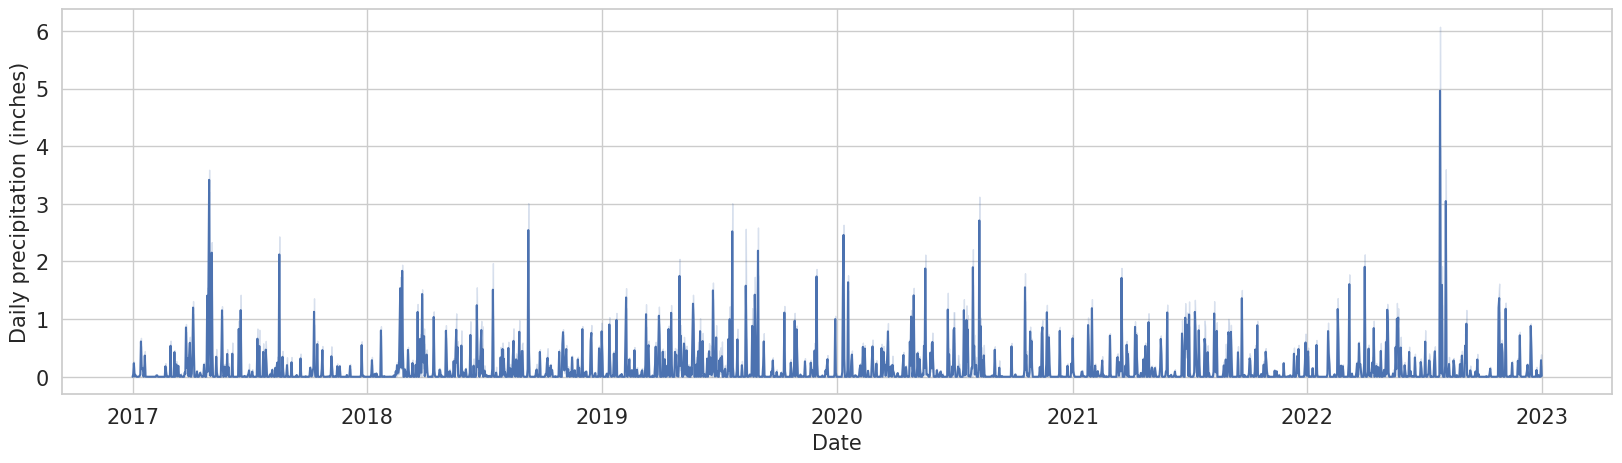

In [20]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15)
plt.tick_params(labelsize=15);

## Select relevant subsets of the data

**Because of discrepencies between the two city's data sets we will begin by selecting only relevant subsets of the data**

In [21]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

## Tutorial: Selecting subsets of a DataFrame

In [22]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


### Select one column

Select the column containing precipitation `PRCP`.

#### Use dictionary-style indexing

In [23]:
df_seattle['PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

#### Use explicit array-style indexing with loc

In [24]:
df_seattle.loc[:,'PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

#### Use implicit array-style indexing with `.iloc`

In [26]:
df_seattle.iloc[:,5]

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

### Select multiple columns

Select the columns containing `STATION`, `DATE`, and precipitation `PRCP`.

In [27]:
df_seattle[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [28]:
df_seattle.loc[:, ['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [29]:
df_seattle.iloc[:, [0, 2, 5]]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


Select all columns from `STATION` through `PRCP`

In [102]:
df_seattle.loc[:,'STATION':'PRCP']

,STATION,NAME,DATE,DAPR,MDPR,PRCP
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25
...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62


### Select the first $n$ rows

Select the first 3 rows

Using the `.head()` method

In [32]:
df_seattle.head(3)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Use implicit indexing

In [33]:
df_seattle.iloc[:3]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Use explicit indexing

In [34]:
df_seattle.loc[:2]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


### Select the last $n$ rows

Use the `.tail()` method

In [35]:
df_seattle.tail(3)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,NaN,NaN,0.17,NaN,NaN,NaN,NaN


Use implicit indexing

In [36]:
df_seattle.iloc[-3:]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,NaN,NaN,0.17,NaN,NaN,NaN,NaN


Use explicit indexing

In [37]:
df_seattle.loc[len(df_seattle)-3:]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,NaN,NaN,0.17,NaN,NaN,NaN,NaN


### Select rows using logical indexing

Select the rows where `PRCP` is greater than 0.

In [38]:
df_seattle['PRCP'] > 0

0       False
1       False
2       False
3       False
4        True
        ...  
1653     True
1654     True
1655     True
1656     True
1657     True
Name: PRCP, Length: 1658, dtype: bool

In [39]:
df_seattle[df_seattle['PRCP'] > 0]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
10,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-14,NaN,NaN,0.20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN


Select the rows where the precipitation is between 0.5 and 0.75 inches.

In [40]:
df_seattle[df_seattle['PRCP'].between(0.5, 0.75)]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
20,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-24,NaN,NaN,0.63,NaN,NaN,NaN,NaN
35,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-08,NaN,NaN,0.55,NaN,NaN,NaN,NaN
41,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-14,NaN,NaN,0.68,NaN,NaN,NaN,NaN
271,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-12-10,NaN,NaN,0.56,NaN,NaN,NaN,NaN
296,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-04,NaN,NaN,0.55,NaN,NaN,NaN,NaN
313,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-23,NaN,NaN,0.70,NaN,NaN,NaN,NaN
331,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-02-11,NaN,NaN,0.70,4.0,NaN,NaN,NaN
419,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-05-17,NaN,NaN,0.60,NaN,NaN,NaN,NaN
472,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-07-19,NaN,NaN,0.62,NaN,NaN,NaN,NaN


In [41]:
df_seattle[(df_seattle['PRCP']>=0.5) & (df_seattle['PRCP']<=0.75)]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
20,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-24,NaN,NaN,0.63,NaN,NaN,NaN,NaN
35,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-08,NaN,NaN,0.55,NaN,NaN,NaN,NaN
41,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-14,NaN,NaN,0.68,NaN,NaN,NaN,NaN
271,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-12-10,NaN,NaN,0.56,NaN,NaN,NaN,NaN
296,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-04,NaN,NaN,0.55,NaN,NaN,NaN,NaN
313,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-23,NaN,NaN,0.70,NaN,NaN,NaN,NaN
331,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-02-11,NaN,NaN,0.70,4.0,NaN,NaN,NaN
419,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-05-17,NaN,NaN,0.60,NaN,NaN,NaN,NaN
472,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-07-19,NaN,NaN,0.62,NaN,NaN,NaN,NaN


## Return to selecting the relevant subsets

We saw that the St. Louis data set contains data prior to 2018. Limit the St. Louis data to 2018 and beyond.

In [42]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [43]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [44]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


In [45]:
df_stlouis['STATION'].value_counts()

USW00003960    1826
USW00013994    1826
USC00237398    1824
USC00237397    1824
US1MOSLC007    1819
USC00237452    1793
US1ILMD0010    1792
US1MOSL0024    1768
US1MOJF0018    1756
US1MOSL0027    1728
US1MOSL0074    1674
US1ILMD0012    1667
US1MOSL0004    1612
US1MOSL0049    1604
US1MOSL0018    1598
US1MOSL0055    1490
US1MOSL0050    1485
US1MOSS0027    1422
US1MOFSA189    1420
US1MOSL0077    1339
US1MOSL0020    1287
US1MOSL0039    1219
US1MOSL0067    1204
US1MOJF0025    1124
US1ILSC0009    1034
US1MOSL0081     914
US1MOSL0063     804
US1MOSL0083     646
US1MOSL0045     628
US1MOSL0062     621
US1MOSL0070     602
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1ILSC0018     237
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1ILMO0006     162
Name: STATION, dtype: int64

The St. Louis data set has values for many weather stations, while the Seattle data set has only one weather station. 

We will focus on the data from the airport in St. Louis.

In [46]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [47]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

## Identify and deal with missing values

Data can be missing in multiple manners:
1. Values are `NaN` in the data frame

In [48]:
df_seattle.head(2)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN


2.  Values are not included in the data set.

### Count the non-null or null values

Use the `.info()` method to determine the number of non-null values in each column. Start with the St. Louis data set.

In [49]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


In [50]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

The St. Louis data set does not have any `NaN` values of `DATE` or `PRCP`.   Nor any dates omitted.

In [51]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


The Seattle data set is missing some dates and precipitation values. We could see this in the time series plot.

We can use the library `missingno` to visualize where values are missing.

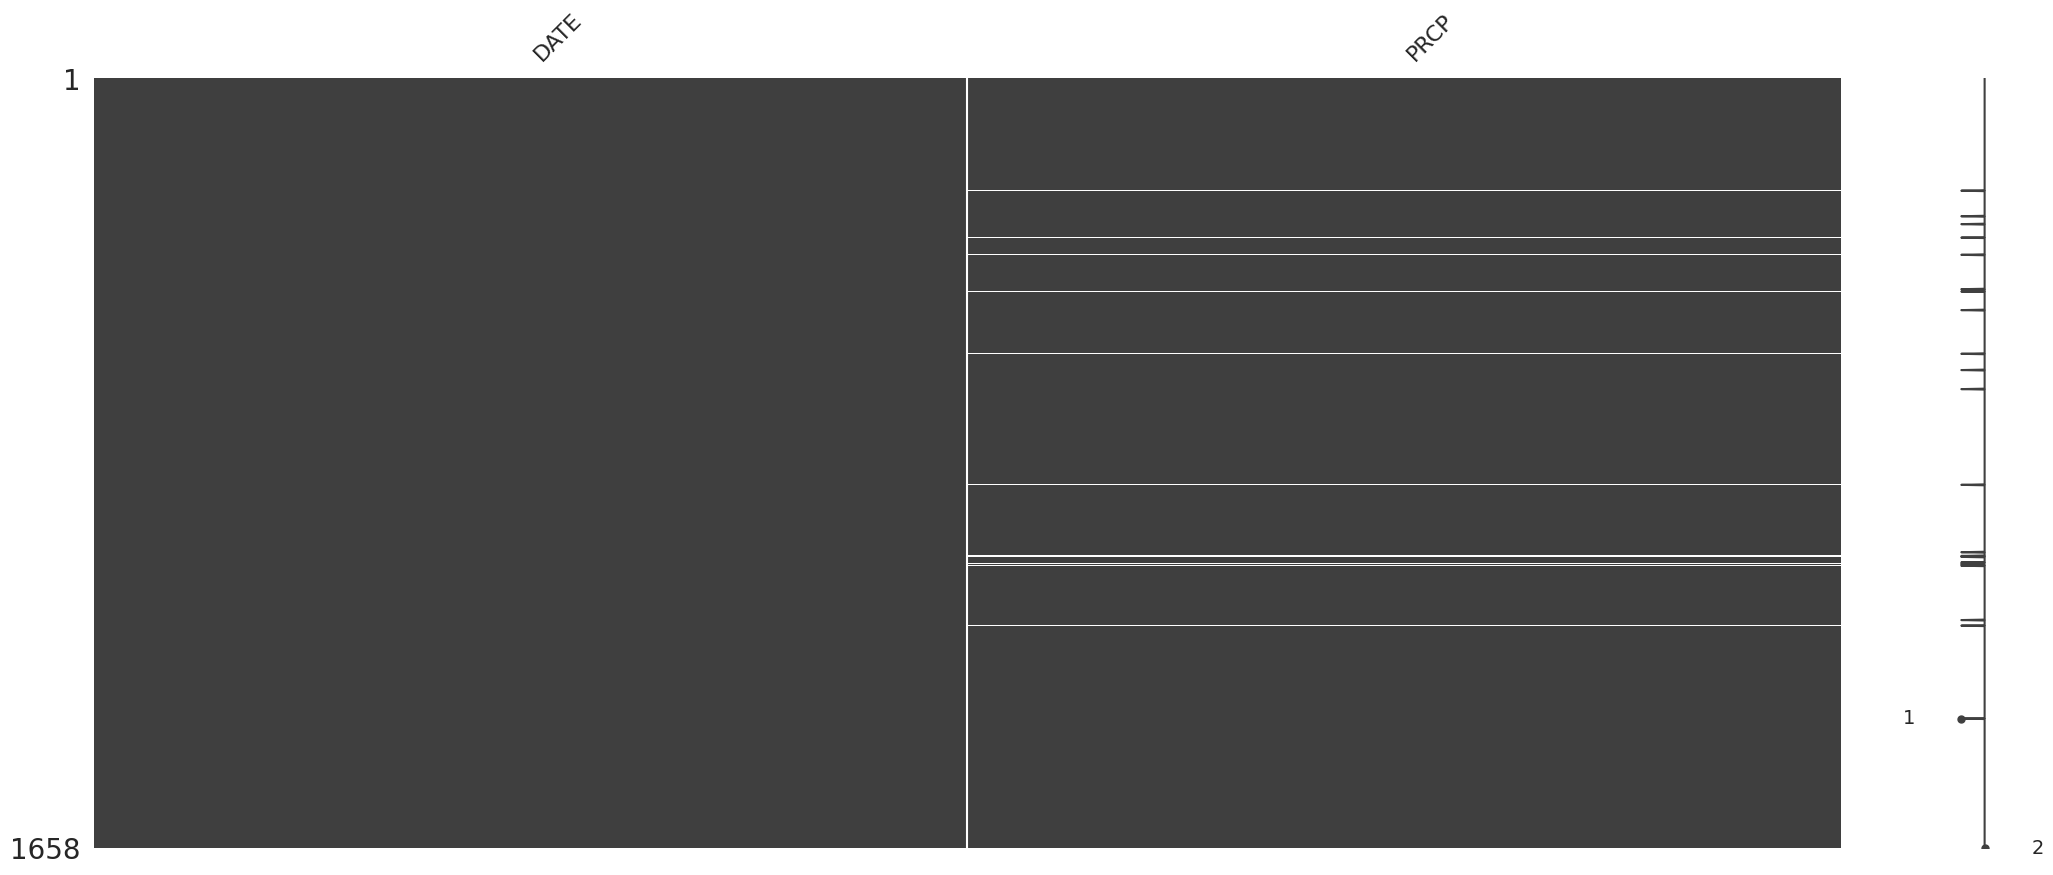

In [52]:
msno.matrix(df_seattle[['DATE','PRCP']]);

This is helpful, but we should note that this does not indicate where there are dates that are not present in the data set. We will return to this issue after joining the data sets because this will show the dates that are missing from the Seattle data set.

St. Louis has data for all dates, so do a left join with St. Louis as the left data set.

In [59]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

In [61]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Each DataFrame had a column named `PRCP`, so the default is to add suffixes _x and _y to differentiate the columns. Normally, I would rename the columns at this point to something more informative. However, I know that I want to convert the DataFrame to a tidy format and I will modify the names later.

## Creating a tidy data frame with columns for city and precipitation

In [68]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [69]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


Rename the city values 'STL' and 'SEA' to follow best practices.

In [70]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [71]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

Rename the columns to be lowercase and more easily understood using `df.rename()`

In [74]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

## Deal with missing values

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


<Axes: >

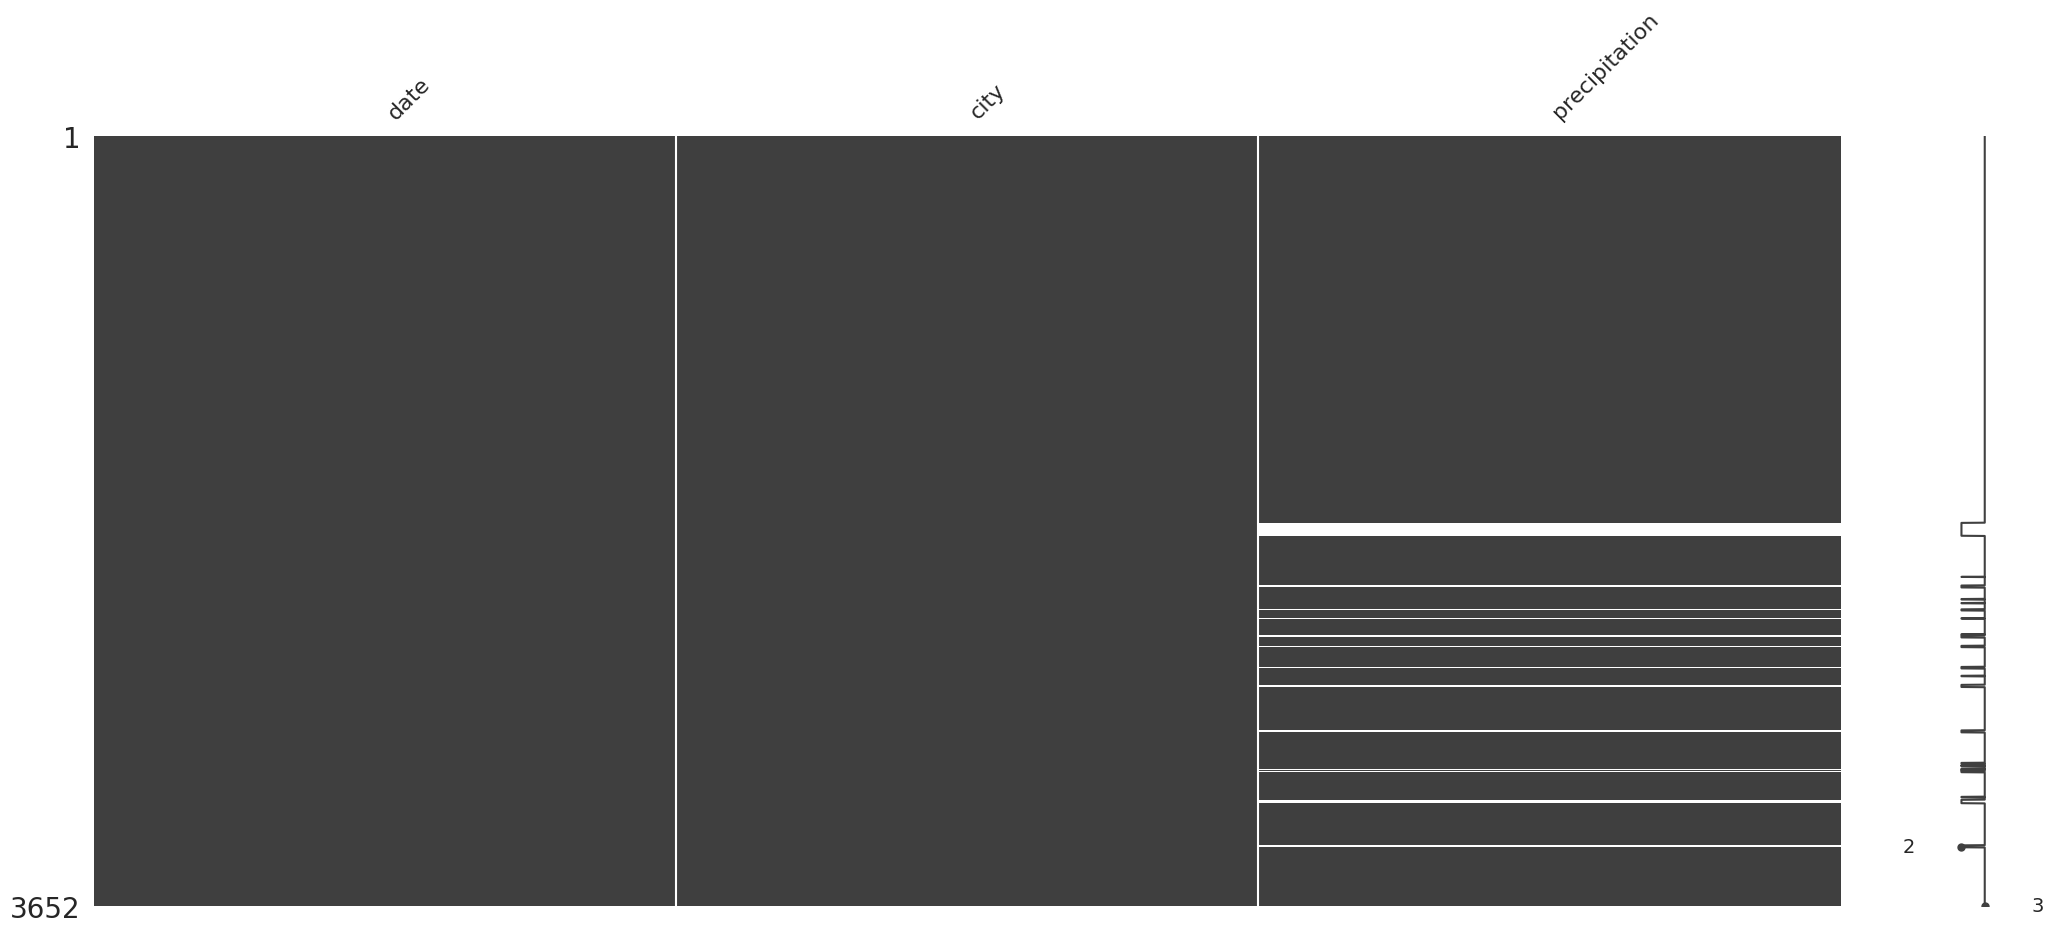

In [77]:
msno.matrix(df)

When we joined the DataFrames using a left join in the St. Louis data set, which is not missing any days, the missing days were created for the Seattle data set. We can see this block of missing values at the beginning of the second half of the precipitation column.

### Impute missing values

We will replace missing values with the mean across years of values on that day. 

Define a column that labels each day by the day of the year: 1, 2, ..., 365.

In [79]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [80]:
df.head(30)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


In [81]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


Get the index of each row where precipitation is missing.

In [82]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [83]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

Compute the mean precipitation for each day in Seattle, averaged across years.

In [84]:
df['day_of_year'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [85]:
pd.DatetimeIndex(df.loc[df['date'] == '2019-03-01', 'date']).day_of_year

Int64Index([60, 60], dtype='int64', name='date')

In [86]:
pd.DatetimeIndex(df.loc[df['date'] == '2020-03-01', 'date']).day_of_year

Int64Index([61, 61], dtype='int64', name='date')

In [87]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [88]:
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


For each missing value, replace it with the mean daily precipitation.

In [89]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Check that there are no missing values.

In [90]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3652 non-null   float64       
 3   day_of_year    3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


In [92]:
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.0,1
1,2018-01-02,STL,0.0,2
2,2018-01-03,STL,0.0,3
3,2018-01-04,STL,0.0,4
4,2018-01-05,STL,0.0,5


Now we can go ahead and start creating graphs that will help us answer our research question

In [93]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [94]:
no_rain = df[df['precipitation'] <= 0].groupby('city').count().reset_index()

In [95]:
no_rain.head()

,city,date,precipitation,day_of_year,month
0,SEA,827,827,827,827
1,STL,1228,1228,1228,1228


<Axes: xlabel='city', ylabel='precipitation'>

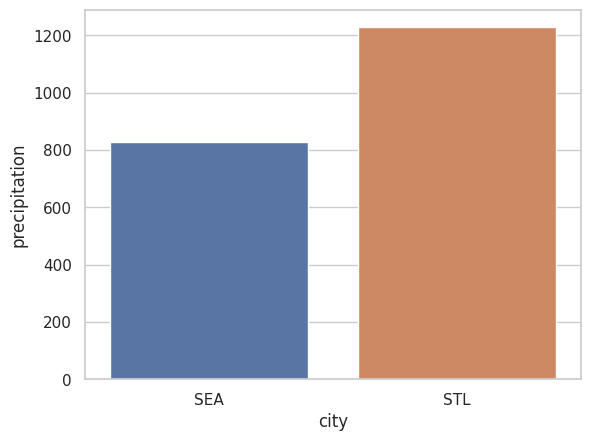

In [96]:
sns.barplot(data= no_rain, x= 'city', y = 'precipitation')

Here we created a graph that tells us how many days each city had where it did not rain. We can see that St. Louis had the most days where it did not rain compared to the city of Seattle.

<Axes: xlabel='month', ylabel='max_precipitation'>

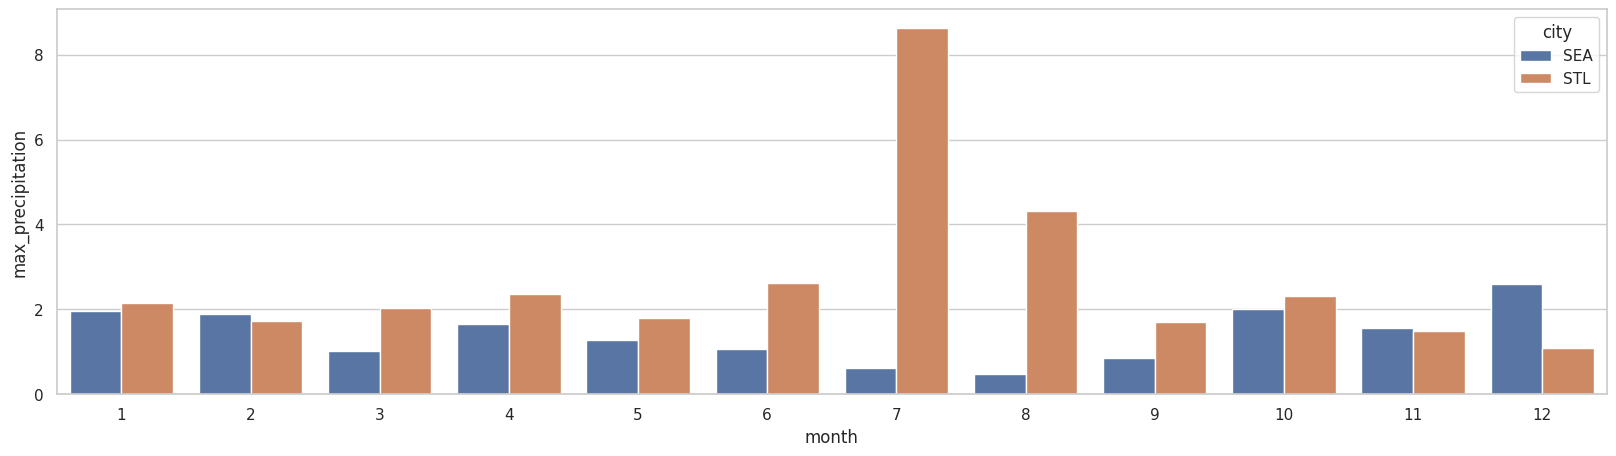

In [97]:
plt.figure(figsize=(20,5))

city_month = df.groupby(['city', 'month'])

max_precipitation = city_month['precipitation'].max().reset_index(name = 'max_precipitation')

sns.barplot(data=max_precipitation, x='month', y='max_precipitation', hue='city')

Here we created a graph that tells us what city had the most rain in each month. Here we can tell that St. Louis on average had more rain in density on the days it did rain than Seattle. 

**Now we know that while it rains more frequently in the city of Seattle, the city of St. Louis gets the most rain when it does rain there.**

## Export the clean .csv file

In [103]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>